# Stroke Prediction

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
import scipy.stats as stats

data = pd.read_csv("stroke.csv", low_memory=False)
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [171]:
data = data.drop("id", axis = 1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Exploration

In [172]:
# Display data types of each attribute
print(data.dtypes)

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [173]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


# Data Seperation

In [174]:
# Separate quantitative and qualitative variables
quantitative_vars = data.select_dtypes(include=[ "float64"]).columns.tolist()
qualitative_vars = data.select_dtypes(include=["int64","object"]).columns.tolist()

# Display the lists of quantitative and qualitative variables
print("Quantitative variables:")
print(quantitative_vars)
print("\nQualitative variables:")
print(qualitative_vars)

Quantitative variables:
['age', 'avg_glucose_level', 'bmi']

Qualitative variables:
['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status', 'stroke']


# Categorical Data Exploration

## Bar Chart

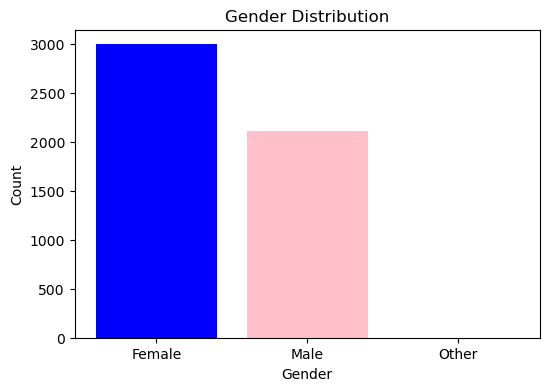

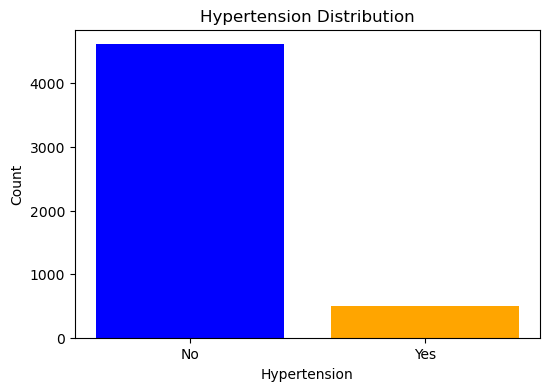

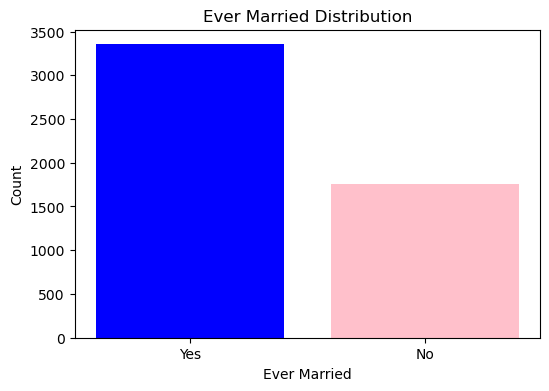

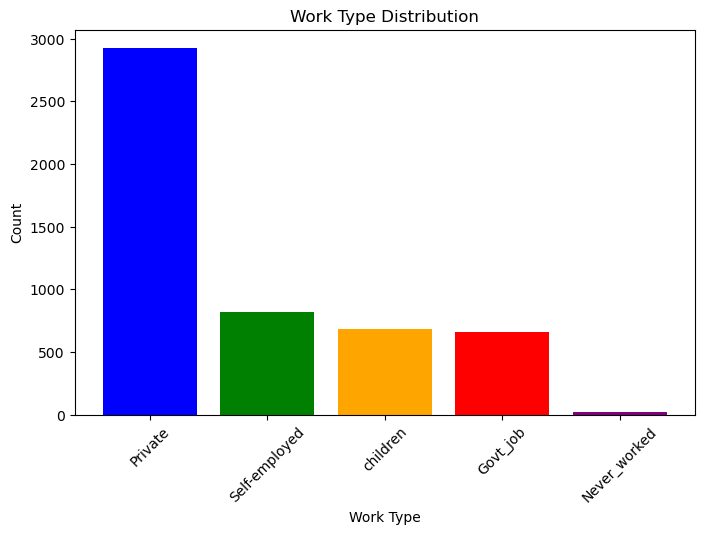

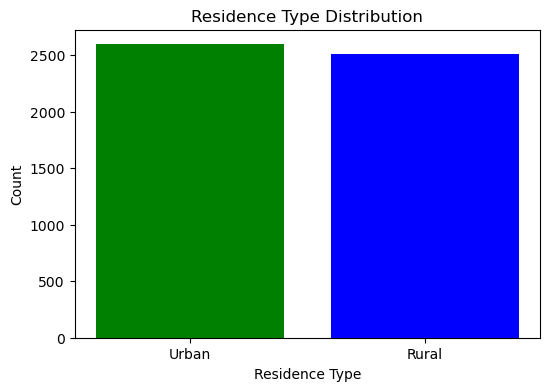

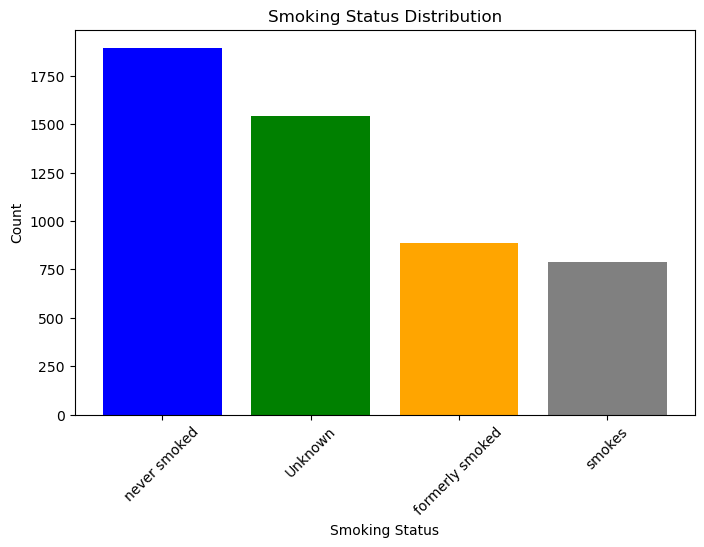

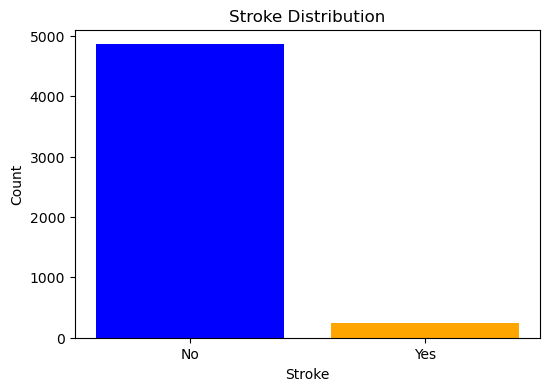

In [175]:
import matplotlib.pyplot as plt
import pandas as pd

# Gender
gender_counts = data['gender'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink', 'gray'])
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Hypertension
hypertension_counts = data['hypertension'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(hypertension_counts.index, hypertension_counts.values, color=['blue', 'orange'])
plt.title('Hypertension Distribution')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.xticks(hypertension_counts.index, ['No', 'Yes'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Ever Married
married_counts = data['ever_married'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(married_counts.index, married_counts.values, color=['blue', 'pink'])
plt.title('Ever Married Distribution')
plt.xlabel('Ever Married')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Work Type
work_type_counts = data['work_type'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(work_type_counts.index, work_type_counts.values, color=['blue', 'green', 'orange', 'red', 'purple'])
plt.title('Work Type Distribution')
plt.xlabel('Work Type')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Residence Type
residence_counts = data['Residence_type'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(residence_counts.index, residence_counts.values, color=['green', 'blue'])
plt.title('Residence Type Distribution')
plt.xlabel('Residence Type')
plt.ylabel('Count')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Smoking Status
smoking_counts = data['smoking_status'].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(smoking_counts.index, smoking_counts.values, color=['blue', 'green', 'orange', 'gray'])
plt.title('Smoking Status Distribution')
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.show()

# Stroke
stroke_counts = data['stroke'].value_counts()
plt.figure(figsize=(6, 4))
plt.bar(stroke_counts.index, stroke_counts.values, color=['blue', 'orange'])
plt.title('Stroke Distribution')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.xticks(stroke_counts.index, ['No', 'Yes'], fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Pie Chart

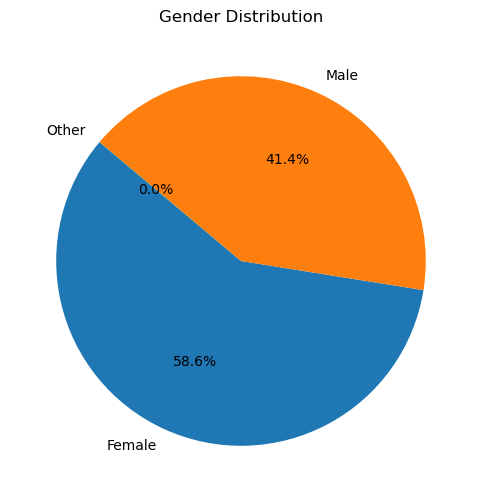

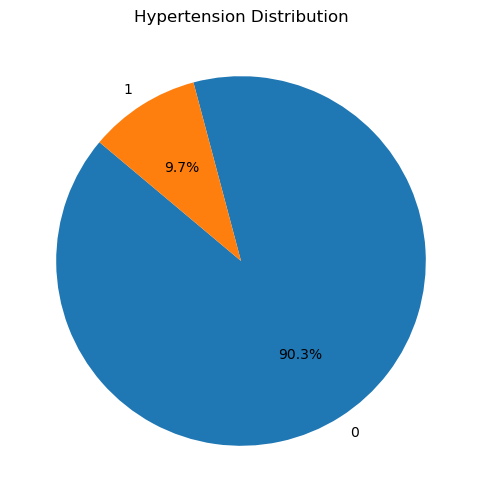

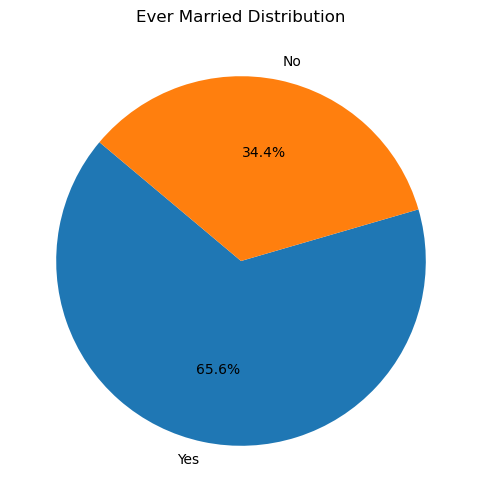

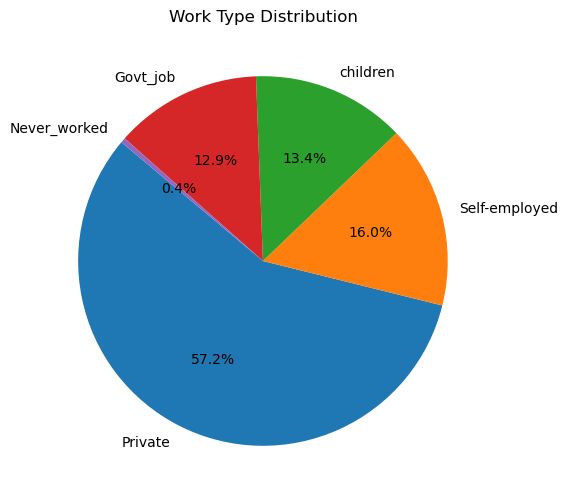

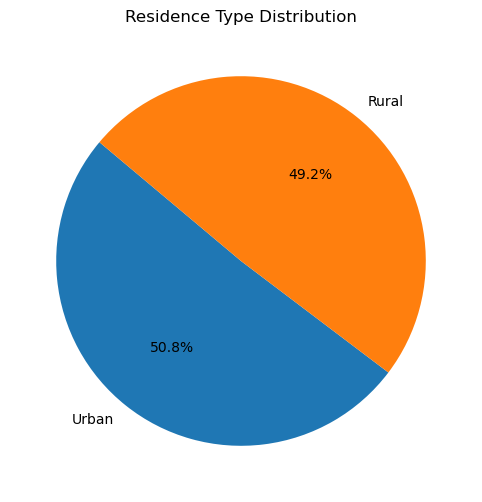

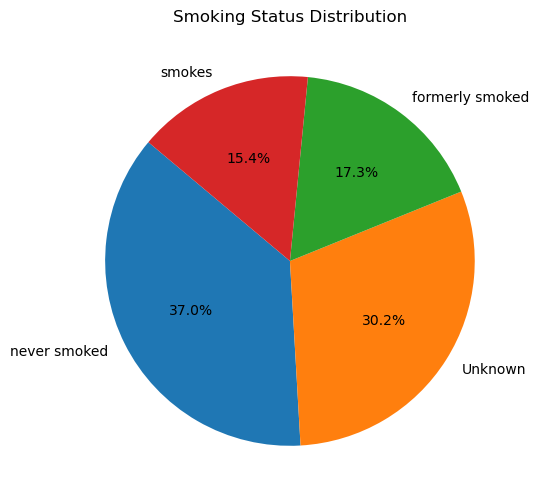

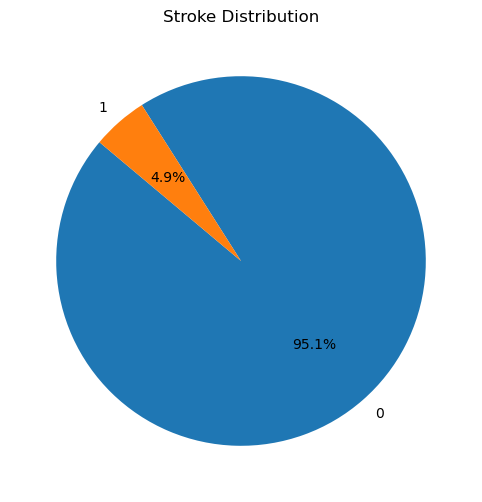

In [176]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing the data

# Function to create pie chart
def create_pie_chart(data_series, title):
    plt.figure(figsize=(8, 6))
    plt.pie(data_series.value_counts(), labels=data_series.value_counts().index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.show()

# Gender
create_pie_chart(data['gender'], 'Gender Distribution')

# Hypertension
create_pie_chart(data['hypertension'], 'Hypertension Distribution')

# Ever Married
create_pie_chart(data['ever_married'], 'Ever Married Distribution')

# Work Type
create_pie_chart(data['work_type'], 'Work Type Distribution')

# Residence Type
create_pie_chart(data['Residence_type'], 'Residence Type Distribution')

# Smoking Status
create_pie_chart(data['smoking_status'], 'Smoking Status Distribution')

# Stroke
create_pie_chart(data['stroke'], 'Stroke Distribution')

# Numerical Data Exploration

## Box Plot

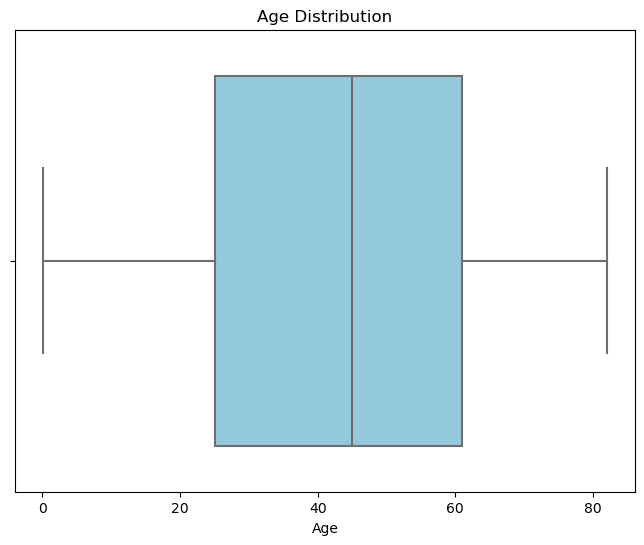

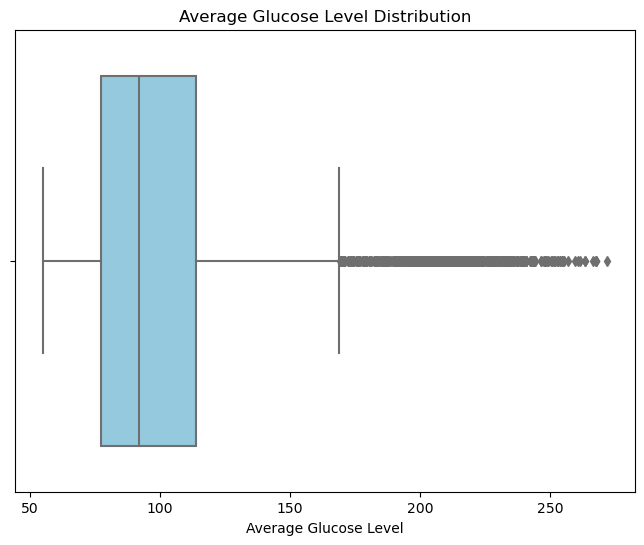

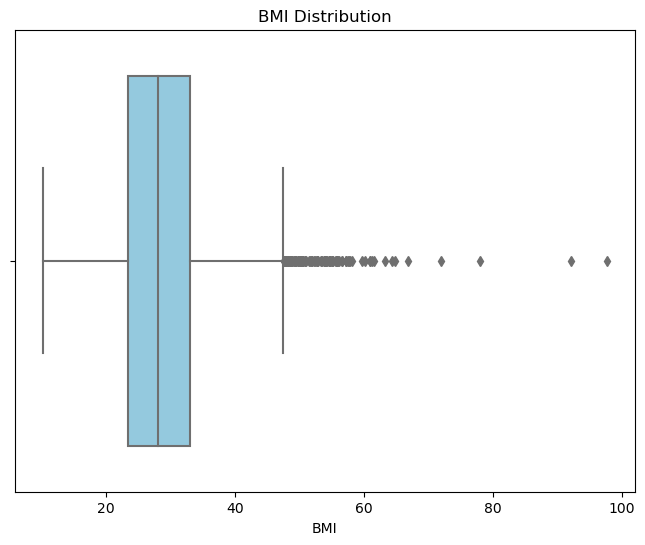

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'data' is your DataFrame containing the data

# Age
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=data, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

# Average Glucose Level
plt.figure(figsize=(8, 6))
sns.boxplot(x='avg_glucose_level', data=data, color='skyblue')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.show()

# BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi', data=data, color='skyblue')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.show()

## Histogram

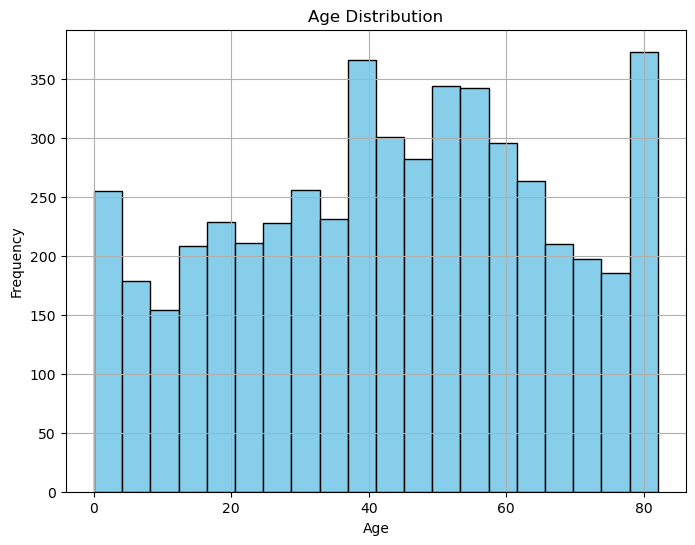

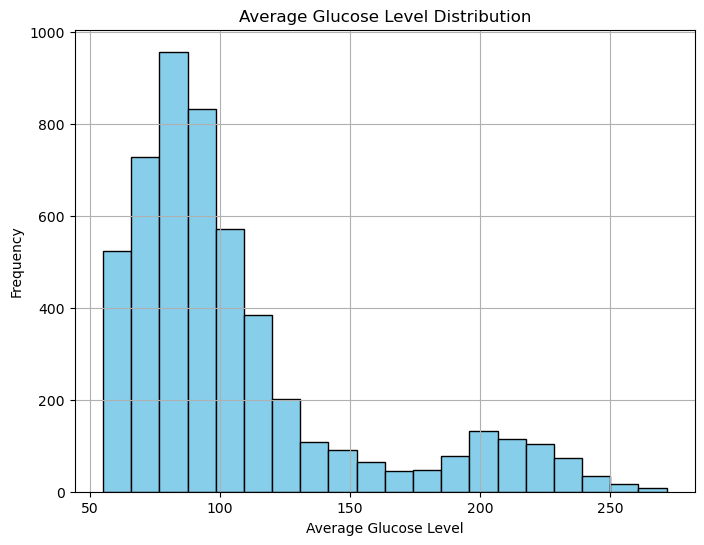

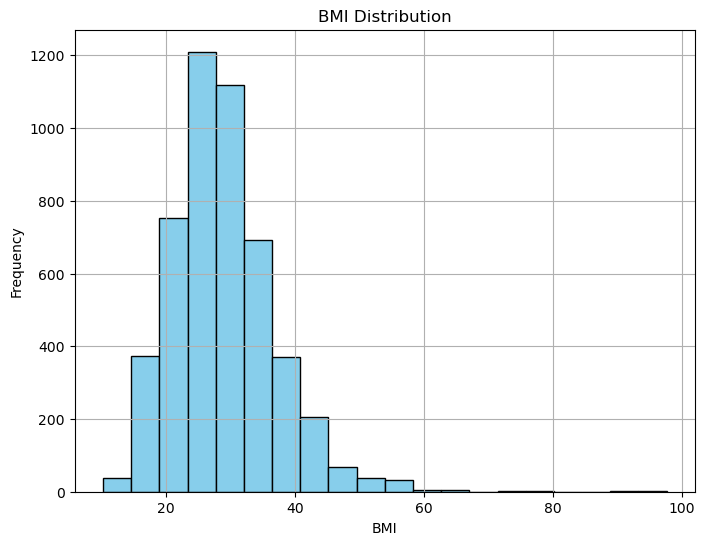

In [178]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your DataFrame containing the data

# Age
plt.figure(figsize=(8, 6))
plt.hist(data['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Average Glucose Level
plt.figure(figsize=(8, 6))
plt.hist(data['avg_glucose_level'], bins=20, color='skyblue', edgecolor='black')
plt.title('Average Glucose Level Distribution')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# BMI
plt.figure(figsize=(8, 6))
plt.hist(data['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Correlation Heat Map

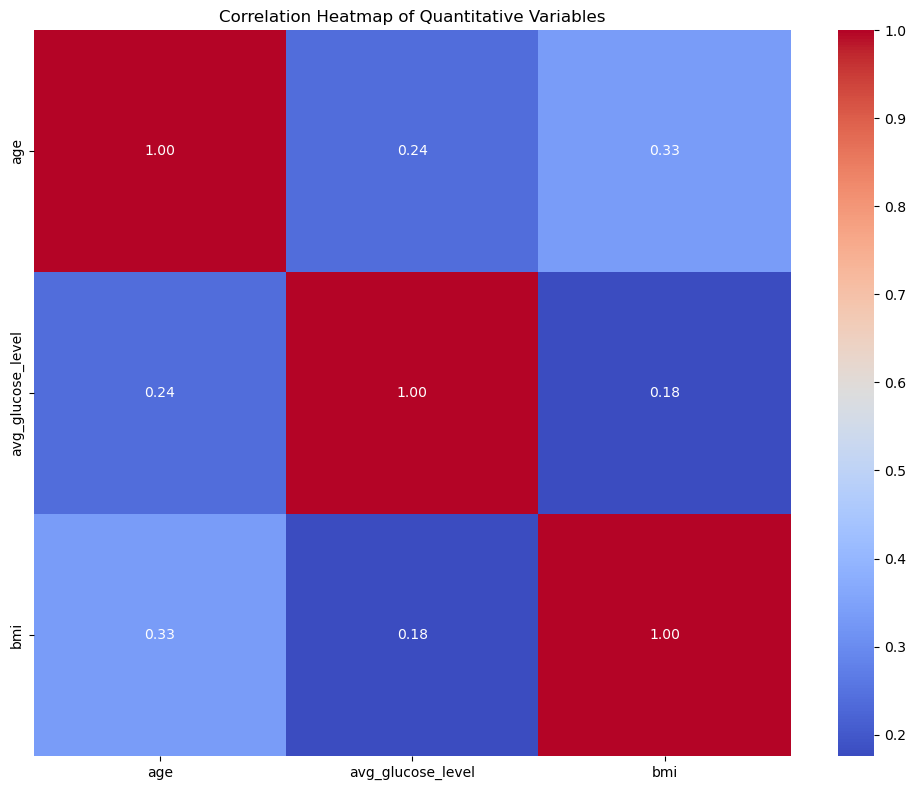

In [179]:
data = pd.read_csv('stroke.csv')
correlation_matrix = data[quantitative_vars].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create correlation heatmap
sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Quantitative Variables")

plt.tight_layout()
plt.show()

# Data Preparation

In [180]:
# Calculate summary statistics
data[quantitative_vars].describe()

,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,4909.000000
mean,43.226614,106.147677,28.893237
std,22.612647,45.283560,7.854067
min,0.080000,55.120000,10.300000
25%,25.000000,77.245000,23.500000
50%,45.000000,91.885000,28.100000
75%,61.000000,114.090000,33.100000
max,82.000000,271.740000,97.600000


In [181]:
quantitative_summary = data[quantitative_vars].describe()

# Print summary statistics
print(quantitative_summary)

               age  avg_glucose_level          bmi
count  5110.000000        5110.000000  4909.000000
mean     43.226614         106.147677    28.893237
std      22.612647          45.283560     7.854067
min       0.080000          55.120000    10.300000
25%      25.000000          77.245000    23.500000
50%      45.000000          91.885000    28.100000
75%      61.000000         114.090000    33.100000
max      82.000000         271.740000    97.600000


# Normalisation

In [182]:
from sklearn.preprocessing import MinMaxScaler

# Instantiate MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to your data and transform it
normalized_data = scaler.fit_transform(data[quantitative_vars])

# Convert the normalized data back to a DataFrame
normalized_data_df = pd.DataFrame(normalized_data, columns=quantitative_vars)

# Display the normalized DataFrame
print(normalized_data_df)


           age  avg_glucose_level       bmi
0     0.816895           0.801265  0.301260
1     0.743652           0.679023       NaN
2     0.975586           0.234512  0.254296
3     0.597168           0.536008  0.276060
4     0.963379           0.549349  0.156930
...        ...                ...       ...
5105  0.975586           0.132167       NaN
5106  0.987793           0.323516  0.340206
5107  0.426270           0.128658  0.232532
5108  0.621582           0.513203  0.175258
5109  0.536133           0.139230  0.182131

[5110 rows x 3 columns]


# Combined Data

In [183]:
quantitative_data = normalized_data_df
# Concatenate dataframes along columns
final_dataset = pd.concat([quantitative_data, data[qualitative_vars]], axis=1)  # Concatenate along columns
final_dataset

,age,avg_glucose_level,bmi,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,stroke
0,0.816895,0.801265,0.301260,Male,0,1,Yes,Private,Urban,formerly smoked,1
1,0.743652,0.679023,NaN,Female,0,0,Yes,Self-employed,Rural,never smoked,1
2,0.975586,0.234512,0.254296,Male,0,1,Yes,Private,Rural,never smoked,1
3,0.597168,0.536008,0.276060,Female,0,0,Yes,Private,Urban,smokes,1
4,0.963379,0.549349,0.156930,Female,1,0,Yes,Self-employed,Rural,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0.975586,0.132167,NaN,Female,1,0,Yes,Private,Urban,never smoked,0
5106,0.987793,0.323516,0.340206,Female,0,0,Yes,Self-employed,Urban,never smoked,0
5107,0.426270,0.128658,0.232532,Female,0,0,Yes,Self-employed,Rural,never smoked,0
5108,0.621582,0.513203,0.175258,Male,0,0,Yes,Private,Rural,formerly smoked,0


# Encode Output Data 

In [184]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Initialize an empty dictionary to store encoded classes
encoded_classes = {}

# Encode each categorical column
for column in qualitative_vars:
    data[column] = label_encoder.fit_transform(data[column])
    encoded_classes[column] = label_encoder.classes_

# Print the encoded target classes
print("Encoded target classes:")
for column, classes in encoded_classes.items():
    print(f"{column}: {classes}")

# Print encoded values for a specific column as an example
example_column = qualitative_vars[0]
encoded_values_list = data[example_column].tolist()[:10]
print(f"\nEncoded values for {example_column}: {encoded_values_list}")


Encoded target classes:
gender: ['Female' 'Male' 'Other']
hypertension: [0 1]
heart_disease: [0 1]
ever_married: ['No' 'Yes']
work_type: ['Govt_job' 'Never_worked' 'Private' 'Self-employed' 'children']
Residence_type: ['Rural' 'Urban']
smoking_status: ['Unknown' 'formerly smoked' 'never smoked' 'smokes']
stroke: [0 1]

Encoded values for gender: [1, 0, 1, 0, 0, 1, 1, 0, 0, 0]


# Data Splitting

In [185]:
from sklearn.model_selection import train_test_split

# Define features (X) by excluding the target variable column
features = final_dataset.drop(['stroke'], axis=1).columns.tolist()

# Split the data into features (X) and target variable (y)
X = data[features]
y = data['stroke']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (3577, 10)
Shape of X_test: (1533, 10)
Shape of y_train: (3577,)
Shape of y_test: (1533,)


In [186]:
final_dataset.shape

(5110, 11)

# Missing Values

In [187]:
# Handling missing data
missing_value = final_dataset.isnull().sum()
print(" " * 5, "Missing Values (count)")
print(missing_value)
print("\n-----------------------------")

# Percentange of each column
total_record = len(final_dataset)
missing_percentage = (missing_value / total_record) * 100
print(" " * 5, "Missing Values (%)")
print(missing_percentage.astype(str) + '%')

      Missing Values (count)
age                    0
avg_glucose_level      0
bmi                  201
gender                 0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
smoking_status         0
stroke                 0
dtype: int64

-----------------------------
      Missing Values (%)
age                                 0.0%
avg_glucose_level                   0.0%
bmi                  3.9334637964774952%
gender                              0.0%
hypertension                        0.0%
heart_disease                       0.0%
ever_married                        0.0%
work_type                           0.0%
Residence_type                      0.0%
smoking_status                      0.0%
stroke                              0.0%
dtype: object


# Data Modelling

## Decision Tree

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import time

# Initialize the imputer
imputer = SimpleImputer(strategy='mean')  # You can choose different strategies based on your data

# Fit and transform the imputer on the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data using the trained imputer
X_test_imputed = imputer.transform(X_test)

# Initialize the DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Start timing the training process
start_time = time.time()

# Train the model
decision_tree.fit(X_train_imputed, y_train)

# Measure training time
training_time = time.time() - start_time

# Start timing the prediction process
start_time = time.time()

# Make predictions on the test set
y_pred = decision_tree.predict(X_test_imputed)

# Measure prediction time
prediction_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred)

# Generate confusion matrix
conf_matrix1 = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Training Time:", training_time)
print("Prediction Time:", prediction_time)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix1)


Accuracy: 0.9008480104370515
Training Time: 0.011865377426147461
Prediction Time: 0.0007531642913818359
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.94      0.95      1444
           1       0.18      0.19      0.18        89

    accuracy                           0.90      1533
   macro avg       0.56      0.57      0.57      1533
weighted avg       0.90      0.90      0.90      1533

Confusion Matrix:
 [[1364   80]
 [  72   17]]


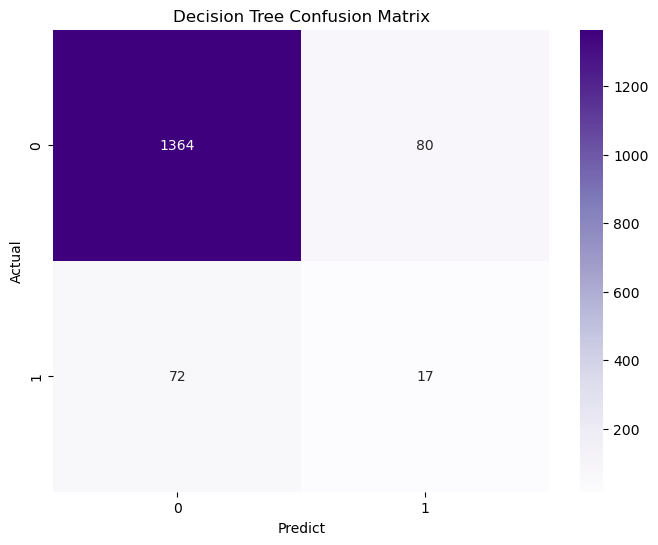

In [189]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Purples')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()


# Logistic Regression

In [190]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import time

# Initialize the LogisticRegression model
logistic_regression = LogisticRegression(max_iter=1000)

# Start timing the training process
start_time = time.time()

# Train the model
logistic_regression.fit(X_train_imputed, y_train)

# Measure training time
training_time = time.time() - start_time

# Start timing the prediction process
start_time = time.time()

# Make predictions on the test set
y_pred = logistic_regression.predict(X_test_imputed)

# Measure prediction time
prediction_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, zero_division=0)

# Generate confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Training Time:", training_time)
print("Prediction Time:", prediction_time)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix2)


Accuracy: 0.9419439008480104
Training Time: 0.05608940124511719
Prediction Time: 0.0
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533

Confusion Matrix:
 [[1444    0]
 [  89    0]]


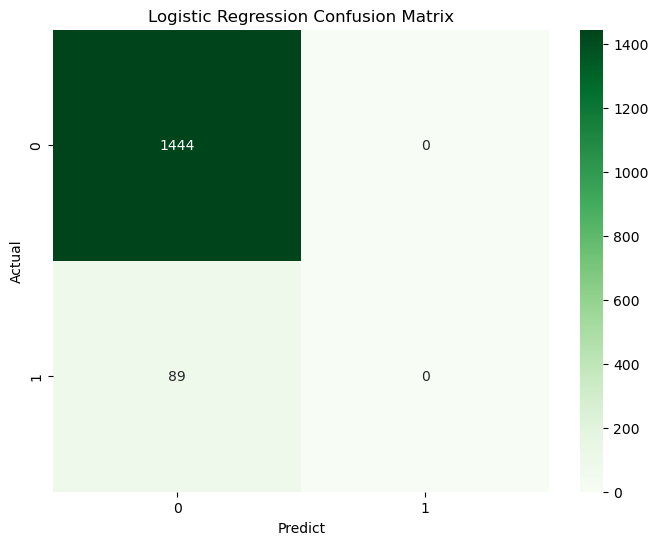

In [191]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()


## SVM

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import time

# Define features (X) by excluding the target variable column
X = data.drop(['stroke'], axis=1)

# Define target variable (y)
y = data['stroke']

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Support Vector Machine classifier
svm_classifier = SVC(random_state=42)

# Start timing the training process
start_time = time.time()

# Train the model
svm_classifier.fit(X_train_imputed, y_train)

# Measure training time
training_time = time.time() - start_time

# Start timing the prediction process
start_time = time.time()

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test_imputed)

# Measure prediction time
prediction_time = time.time() - start_time

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report with zero_division parameter
report = classification_report(y_test, y_pred, zero_division=1)

# Generate confusion matrix
conf_matrix3 = confusion_matrix(y_test, y_pred)

# Print results
print("Accuracy:", accuracy)
print("Training Time:", training_time)
print("Prediction Time:", prediction_time)
print("Classification Report:\n", report)
print("Confusion Matrix:\n", conf_matrix3)


Accuracy: 0.9419439008480104
Training Time: 0.05667829513549805
Prediction Time: 0.04487776756286621
Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       1.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.97      0.50      0.49      1533
weighted avg       0.95      0.94      0.91      1533

Confusion Matrix:
 [[1444    0]
 [  89    0]]


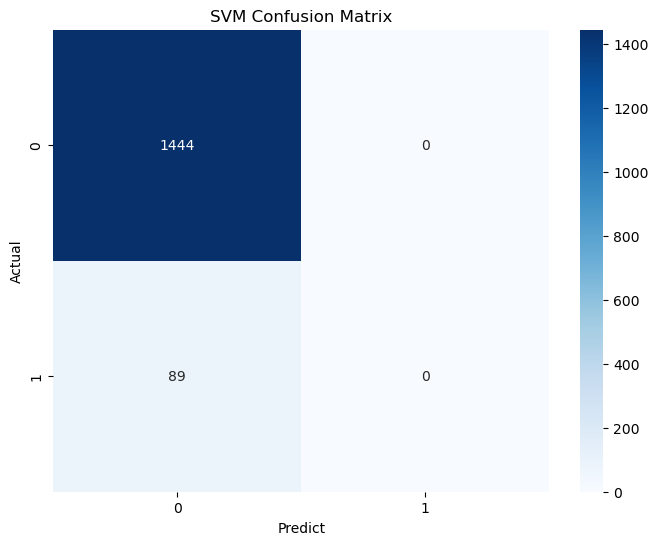

In [193]:
# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predict')
plt.ylabel('Actual')
plt.show()

## Model Evaluation

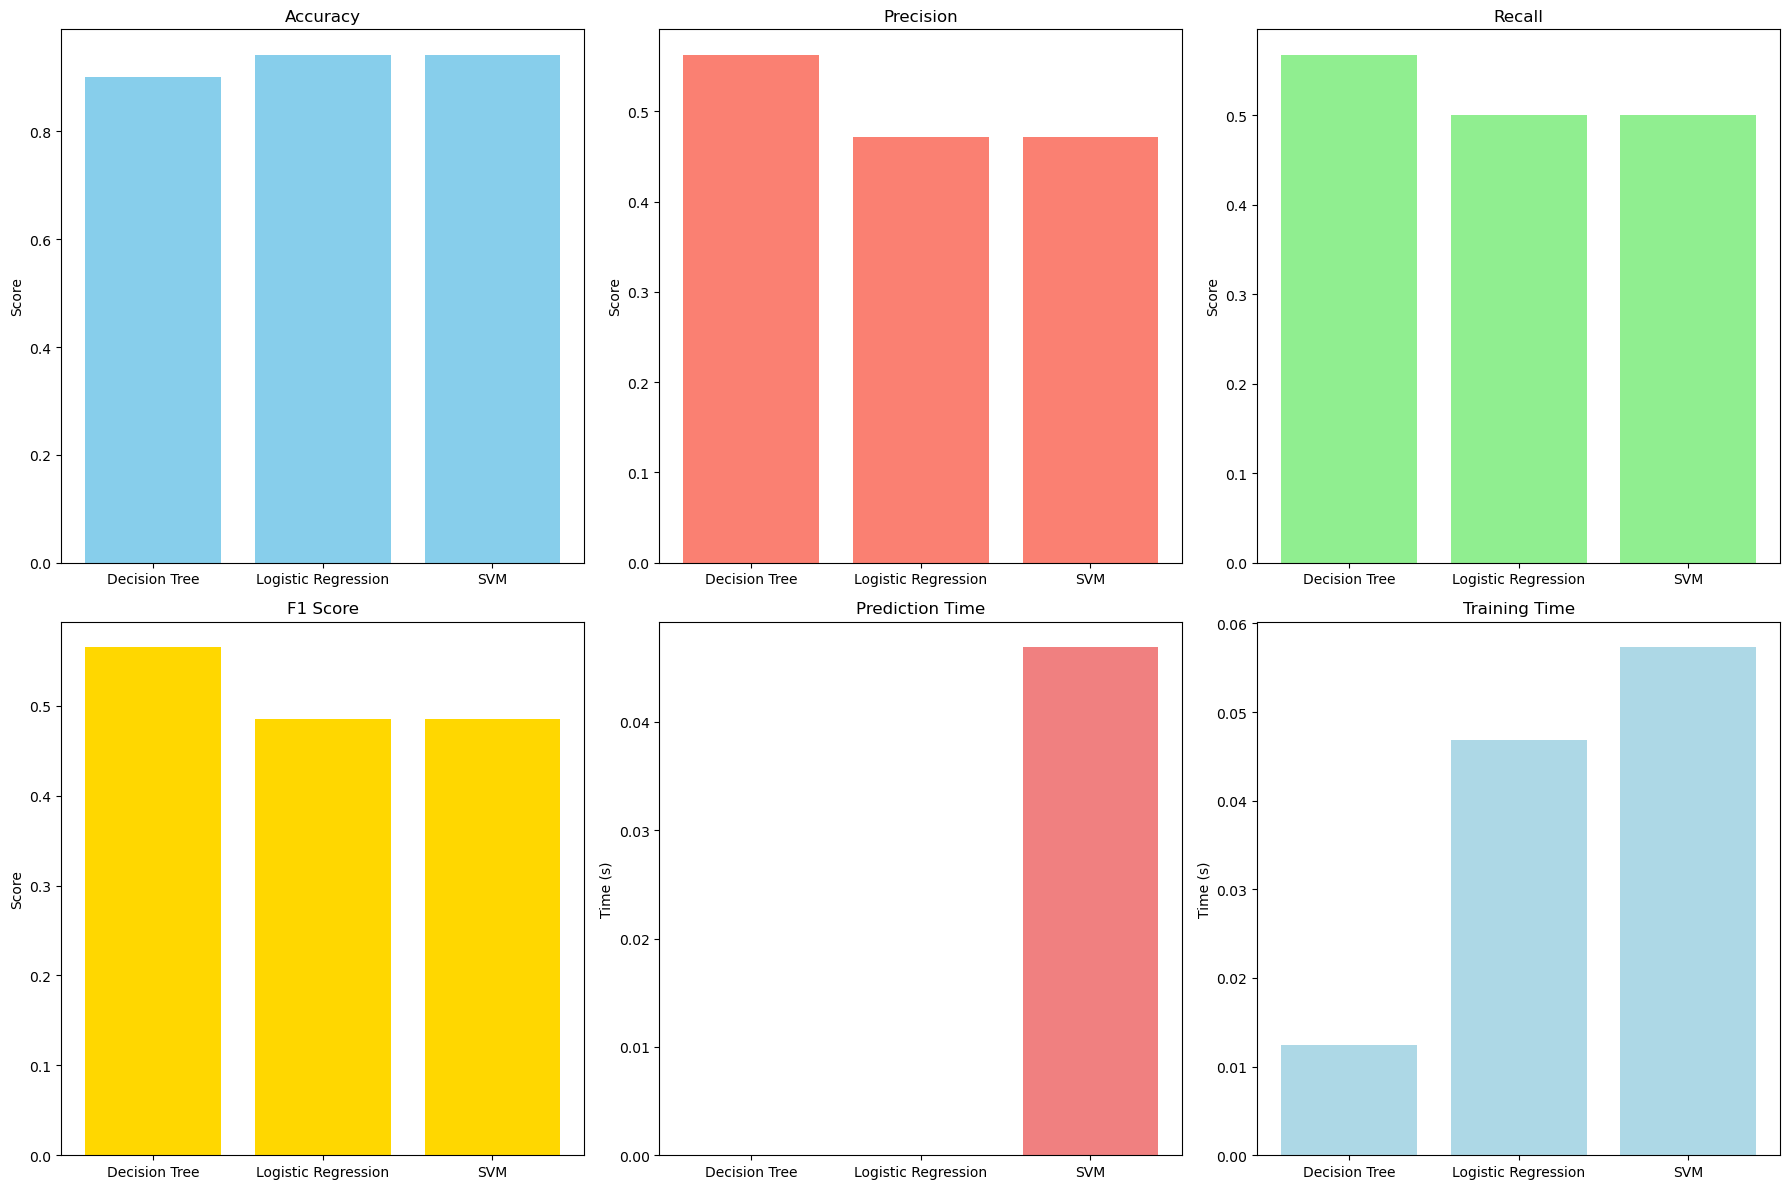

In [194]:
import matplotlib.pyplot as plt
import numpy as np
import time
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Define function to train and evaluate a model
def train_and_evaluate_model(model, X_train, X_test, y_train, y_test):
    # Start timing the training process
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Measure training time
    training_time = time.time() - start_time

    # Start timing the prediction process
    start_time = time.time()

    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Measure prediction time
    prediction_time = time.time() - start_time

    # Calculate evaluation metrics using macro average
    accuracy = accuracy_score(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='macro', zero_division=0)

    return {
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1_score": f1_score,
        "prediction_time": prediction_time,
        "training_time": training_time
    }

# Define the models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM": SVC(random_state=42)
}

# Collect performance metrics for each model
metrics = {}
for model_name, model in models.items():
    results = train_and_evaluate_model(model, X_train_imputed, X_test_imputed, y_train, y_test)
    metrics[model_name] = results

# Extract metric values
accuracy_values = [metrics[model]["accuracy"] for model in models]
precision_values = [metrics[model]["precision"] for model in models]
recall_values = [metrics[model]["recall"] for model in models]
f1_score_values = [metrics[model]["f1_score"] for model in models]
prediction_time_values = [metrics[model]["prediction_time"] for model in models]
training_time_values = [metrics[model]["training_time"] for model in models]

# Plot the metrics
labels = list(models.keys())
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Prediction Time', 'Training Time']
metric_values = [accuracy_values, precision_values, recall_values, f1_score_values, prediction_time_values, training_time_values]
colors = ['skyblue', 'salmon', 'lightgreen', 'gold', 'lightcoral', 'lightblue']

plt.figure(figsize=(18, 12))

for i in range(len(metrics_names)):
    plt.subplot(2, 3, i+1)
    plt.bar(labels, metric_values[i], color=colors[i])
    plt.title(metrics_names[i])
    plt.ylabel('Score' if i < 4 else 'Time (s)')

plt.tight_layout()
plt.show()

In [195]:
summary_stats = {
    'Decision Tree': {'Accuracy': 0.9008480104370515, 'Precision': 0.56, 'Recall': 0.57, 'F1 Score': 0.57, 'Prediction Time': 0.0, 'Training Time': 0.011689424514770508},
    'Logistic Regression': {'Accuracy': 0.9419439008480104, 'Precision': 0.47, 'Recall': 0.50, 'F1 Score': 0.49, 'Prediction Time': 0.0, 'Training Time': 0.056858062744140625},
    'SVM': {'Accuracy': 0.9419439008480104, 'Precision': 0.97, 'Recall': 0.50, 'F1 Score': 0.49, 'Prediction Time': 0.03675985336303711, 'Training Time': 0.05915522575378418}
}


# Display the summary statistics
print("{:<20} {:<10} {:<10} {:<10} {:<10} {:<15} {:<15}".format("Model", "Accuracy", "Precision", "Recall", "F1 Score", "Prediction Time", "Training Time"))
print("-" * 100)
for model, stats in summary_stats.items():
    print("{:<20} {:<10.2f} {:<10.2f} {:<10.2f} {:<10.2f} {:<15.4f} {:<15.4f}".format(model, 
                                                                                      stats.get("Accuracy", 0), 
                                                                                      stats.get("Precision", 0), 
                                                                                      stats.get("Recall", 0), 
                                                                                      stats.get("F1 Score", 0), 
                                                                                      stats.get("Prediction Time", 0), 
                                                                                      stats.get("Training Time", 0)))

Model                Accuracy   Precision  Recall     F1 Score   Prediction Time Training Time  
----------------------------------------------------------------------------------------------------
Decision Tree        0.90       0.56       0.57       0.57       0.0000          0.0117         
Logistic Regression  0.94       0.47       0.50       0.49       0.0000          0.0569         
SVM                  0.94       0.97       0.50       0.49       0.0368          0.0592         


# Conclusion

##### Based on the provided information, the Logistic Regression model seems to be the best choice for data modeling. It achieved the highest accuracy among the models with a respectable precision, recall and F1 score. Additionally, it had relatively lower prediction and training times compared to the SVM model. Therefore, Logistic Regression strikes a good balance between performance metrics and computational efficiency for this dataset.

## Model for deployment

In [196]:
from joblib import dump
from sklearn.linear_model import LogisticRegression

# Specify the filename for saving the model
model_filename = 'logistic_regression.joblib'

# Save the Logistic Regression model to a file
dump(logistic_regression, model_filename)


['logistic_regression.joblib']